# "Оптимизация процесса обработки больших наборов текстовой информации"

# Выполнила: Подшивалова Анастасия

**Цель работы:**\
Изучение методов машинного обучения для оптимизации процесса обработки больших наборов текстовой информации.

**Задачи работы:**
1) Поиск больших наборов текстовой информации.\
2) Исследование полученных данных.\
3) Построение модели машинного обучения.\
4) Оптимизация модели машинного обучения.\
5) Результаты, анализ и вывод.

**Ожидаемые результаты:**
Получение оптимизированного процесса обработки.

**Описание датасета:**
Датасет состоит из текста, содержащего какую-то эмоцию. Он имеет 2 столбца: Text и Emotion.  В «Text» содержится необработанный текст. В «Emotion» содежится эмоция, которая подразумевается текстом. Датасет разделен на train, test и validation для построения модели машинного обучения

Пример:\
Text = 'i feel like I am still looking at a blank canvas blank pieces of paper'\
Emotion = 'sadness'

# 1) Поиск больших наборов текстовой информации. 

https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp

In [1]:
import re
import nltk
import string
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional
from keras.models import load_model

stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()

# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC


In [2]:
df_train = pd.read_csv('train.txt', names=['Text', 'Emotion'], sep=';')
df_val = pd.read_csv('val.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('test.txt', names=['Text', 'Emotion'], sep=';')

# 2) Исследование полученных данных.

In [3]:
df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
df_train.shape

(16000, 2)

In [5]:
df_test.head()

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [6]:
df_test.shape

(2000, 2)

In [7]:
df_val.head()

,Text,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [8]:
df_val.shape

(2000, 2)

## Тренировочный датасет

In [9]:
df_train.Emotion.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In [10]:
df_train.Emotion.value_counts() / df_train.shape[0] *100

joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: Emotion, dtype: float64

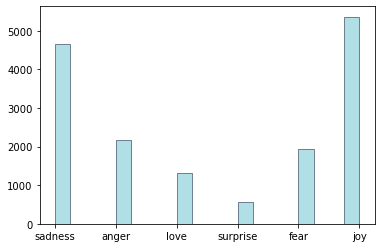

In [11]:
plt.hist(df_train.Emotion,color = 'powderblue',edgecolor = 'slategray', bins =20 )
plt.show()

In [12]:
#проверка на пустые значения
df_train.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [13]:
# их нет

In [14]:
# повторения
df_train.duplicated().sum()

1

In [15]:
# удаление дубликатов
index = df_train[df_train.duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [16]:
# текст может повторяться, но эмоции разные
df_train[df_train['Text'].duplicated() == True]

,Text,Emotion
5067,i feel on the verge of tears from weariness i ...,joy
6133,i still feel a craving for sweet food,love
6563,i tend to stop breathing when i m feeling stre...,anger
7623,i was intensely conscious of how much cash i h...,sadness
7685,im still not sure why reilly feels the need to...,surprise
8246,i am not amazing or great at photography but i...,love
9596,ive also made it with both sugar measurements ...,joy
9687,i had to choose the sleek and smoother feel of...,joy
9769,i often find myself feeling assaulted by a mul...,sadness
9786,i feel im being generous with that statement,joy


In [17]:
# удаление дубликатов текста
index = df_train[df_train['Text'].duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [18]:
temp =df_train.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp

,Text,Emotion,stop_words
0,i didnt feel humiliated,sadness,1
1,i can go from feeling so hopeless to so damned...,sadness,10
2,im grabbing a minute to post i feel greedy wrong,anger,3
3,i am ever feeling nostalgic about the fireplac...,love,9
4,i am feeling grouchy,anger,2
...,...,...,...
15964,i just had a very brief time in the beanbag an...,sadness,13
15965,i am now turning and i feel pathetic that i am...,sadness,7
15966,i feel strong and good overall,joy,2
15967,i feel like this was such a rude comment and i...,anger,8


In [19]:
# стоп-слова надо удалить, но сделать при этом проверку на пустое содержание колонки с текстом,
# т.к. весь текст может состоять из сто-слов 

<AxesSubplot:ylabel='Frequency'>

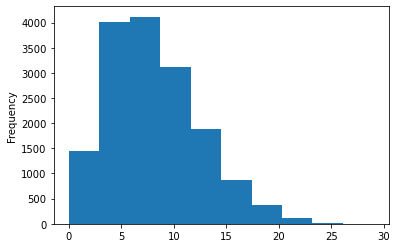

In [20]:
# распределение стоп-слов
temp['stop_words'].plot(kind= 'hist')

## Тестовый датасет

In [21]:
df_test.Emotion.value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: Emotion, dtype: int64

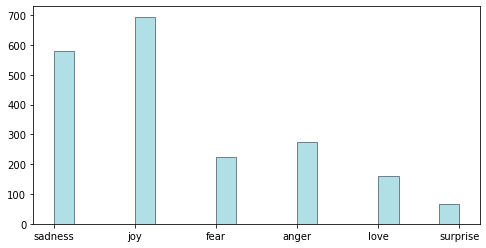

In [22]:
plt.figure(figsize=(8,4))
plt.hist(df_test.Emotion,color = 'powderblue',edgecolor = 'slategray', bins =20 )
plt.show()

In [23]:
df_test.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [24]:
print(df_test.duplicated().sum())
df_test[df_test['Text'].duplicated() == True]

0


,Text,Emotion


In [25]:
#Количество стоп-слов на каждую строку
temp =df_test.copy()
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp

,Text,Emotion,stop_words
0,im feeling rather rotten so im not very ambiti...,sadness,4
1,im updating my blog because i feel shitty,sadness,3
2,i never make her separate from me because i do...,sadness,10
3,i left with my bouquet of red and yellow tulip...,joy,9
4,i was feeling a little vain when i did this one,sadness,6
...,...,...,...
1995,i just keep feeling like someone is being unki...,anger,17
1996,im feeling a little cranky negative after this...,anger,3
1997,i feel that i am useful to my people and that ...,joy,9
1998,im feeling more comfortable with derby i feel ...,joy,8


<AxesSubplot:ylabel='Frequency'>

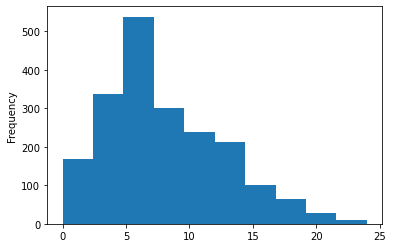

In [26]:
temp['stop_words'].plot(kind= 'hist')

## Validation датасет (для проверки)

In [27]:
df_val.Emotion.value_counts()

joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: Emotion, dtype: int64

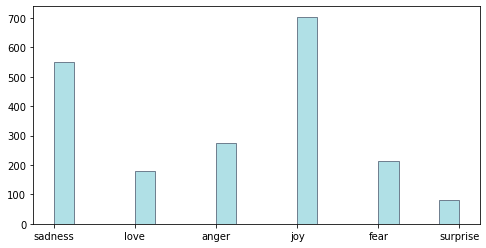

In [28]:
plt.figure(figsize=(8,4))
plt.hist(df_val.Emotion,color = 'powderblue',edgecolor = 'slategray', bins =20 )
plt.show()

In [29]:
df_val.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [30]:
df_val.duplicated().sum()

0

In [31]:
# Строки где текст повторяется
df_val[df_val['Text'].duplicated() == True]

,Text,Emotion
603,i have had several new members tell me how com...,joy
1993,i feel so tortured by it,anger


In [32]:
index = df_val[df_val['Text'].duplicated() == True].index
df_val.drop(index, axis = 0, inplace = True)
df_val.reset_index(inplace=True, drop = True)

In [33]:
temp =df_val.copy()
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp

,Text,Emotion,stop_words
0,im feeling quite sad and sorry for myself but ...,sadness,7
1,i feel like i am still looking at a blank canv...,sadness,5
2,i feel like a faithful servant,love,2
3,i am just feeling cranky and blue,anger,4
4,i can have for a treat or if i am feeling festive,joy,8
...,...,...,...
1993,im having ssa examination tomorrow in the morn...,sadness,11
1994,i constantly worry about their fight against n...,joy,10
1995,i feel its important to share this info for th...,joy,9
1996,i truly feel that if you are passionate enough...,joy,10


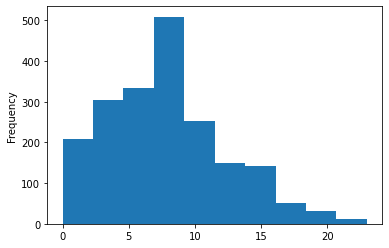

In [34]:
# распределение колва стоп-слов по кол-ву содержащих их строк
temp['stop_words'].plot(kind= 'hist');

## Чистка текста

In [35]:
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()
    text = text.split()
    text=[lemmatizer.lemmatize(y) for y in text]
    return " " .join(text)

def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):
    text = text.split()
    text=[y.lower() for y in text]
    return " " .join(text)

def Removing_punctuations(text):
    ##все символы будут обрабатываться только как текстовые символы -> заменяем на пробел
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## большое колво пробелов заменяю одним
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan
            
def normalize_text(df):
    df.Text=df.Text.apply(lambda text : lower_case(text))
    df.Text=df.Text.apply(lambda text : remove_stop_words(text))
    df.Text=df.Text.apply(lambda text : Removing_numbers(text))
    df.Text=df.Text.apply(lambda text : Removing_punctuations(text))
    df.Text=df.Text.apply(lambda text : Removing_urls(text))
    df.Text=df.Text.apply(lambda text : lemmatization(text))
    return df

def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

In [36]:
normalized_sentence("My Name is Mohamed. @Tweets,  plays 2022  Egypt_")


'name mohamed tweet play egypt'

In [37]:
df_train= normalize_text(df_train)
df_test= normalize_text(df_test)
df_val= normalize_text(df_val)

# 3) Построение модели машинного обучения.

### TF-IDF

In [38]:
# Предпроцессинг
X_train = df_train['Text'].values
y_train = df_train['Emotion'].values

X_test = df_test['Text'].values
y_test = df_test['Emotion'].values

X_val = df_val['Text'].values
y_val = df_val['Emotion'].values

In [38]:
def train_model(model, data, targets):
    #Предобработчик текстовых данных, который конвертирует каждый текстовый документ в набор чисел с помощью метода TF-IDF
    text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
    text_clf.fit(data, targets)
    return text_clf

In [39]:
def get_F1(trained_model,X,y): # функция для получения метрики f1_score
    predicted=trained_model.predict(X)
    f1=f1_score(y,predicted, average=None)
    return f1

### Logistic Regression + Training set

In [40]:
log_reg = train_model(LogisticRegression(solver='liblinear',random_state = 0), X_train, y_train)

y_pred=log_reg.predict(['Happy']) # Пример  
y_pred

array(['joy'], dtype=object)

In [41]:
#Тестирование модели на тестовых данных
y_pred=log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.89      0.83      0.86       275
        fear       0.88      0.77      0.82       224
         joy       0.83      0.96      0.89       695
        love       0.86      0.60      0.70       159
     sadness       0.90      0.93      0.92       581
    surprise       0.94      0.47      0.63        66

    accuracy                           0.87      2000
   macro avg       0.88      0.76      0.80      2000
weighted avg       0.87      0.87      0.86      2000



### The Decision Tree + Training set

In [42]:
DT = train_model(DecisionTreeClassifier(random_state = 0),X_train, y_train)
y_pred=DT.predict(X_test)
DT_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.86      0.89      0.87       275
        fear       0.80      0.79      0.80       224
         joy       0.90      0.88      0.89       695
        love       0.72      0.76      0.74       159
     sadness       0.90      0.90      0.90       581
    surprise       0.60      0.64      0.62        66

    accuracy                           0.86      2000
   macro avg       0.80      0.81      0.80      2000
weighted avg       0.86      0.86      0.86      2000



### The Support Vector Machine + Training set

In [43]:
SVM = train_model(SVC(random_state = 0), X_train, y_train)
y_pred=SVM.predict(X_test)
SVM_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.90      0.82      0.86       275
        fear       0.86      0.79      0.83       224
         joy       0.83      0.96      0.89       695
        love       0.84      0.57      0.68       159
     sadness       0.91      0.92      0.91       581
    surprise       0.85      0.53      0.65        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.80      2000
weighted avg       0.87      0.87      0.86      2000



### The Random Forest + Training set

In [44]:
RF = train_model(RandomForestClassifier(random_state = 0), X_train, y_train)

y_pred=RF.predict(X_test)
RF_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.90      0.91      0.90       275
        fear       0.85      0.88      0.87       224
         joy       0.89      0.93      0.91       695
        love       0.80      0.69      0.74       159
     sadness       0.95      0.92      0.93       581
    surprise       0.68      0.59      0.63        66

    accuracy                           0.89      2000
   macro avg       0.85      0.82      0.83      2000
weighted avg       0.89      0.89      0.89      2000



## Результаты по всем моделям

In [45]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Support Vector Machine','Random Forest'],
    'Accuracy': [log_reg_accuracy.round(2), DT_accuracy.round(2), SVM_accuracy.round(2), RF_accuracy.round(2)]})

models.sort_values(by='Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

,Model,Accuracy
0,Random Forest,0.89
1,Logistic Regression,0.87
2,Support Vector Machine,0.87
3,Decision Tree,0.86


# 4) Оптимизация модели машинного обучения.
## Text Preprocessing

Встраивание слов с помощью glove (метод Global Vectors) и использование модели последовательности

Ссылка на этот файл, содержащий предобученную матрицу векторов слов на основе метода Global Vectors, описывающую слова на английском языке. 

https://www.kaggle.com/datasets/incorpes/glove6b200d

In [39]:
X_train = df_train['Text']
y_train = df_train['Emotion']

X_test = df_test['Text']
y_test = df_test['Emotion']

X_val = df_val['Text']
y_val = df_val['Emotion']

In [40]:
# Кодировка у
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)
y_train, y_test, y_val

(array([4, 4, 0, ..., 2, 0, 4]),
 array([4, 4, 4, ..., 2, 2, 1]),
 array([4, 4, 3, ..., 2, 2, 2]))

In [41]:
print(set(y_train))

{0, 1, 2, 3, 4, 5}


In [42]:
# Закодированный вектор в двоичную матрицу
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [43]:
print(y_train)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


## Tokenizing

In [44]:
# Tokenize слов
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))

In [45]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

In [46]:
sequences_train

[[53, 2, 531],
 [31, 3, 421, 3445, 435, 45, 56, 176, 1223],
 [5, 2719, 393, 147, 2, 355, 302],
 [74, 3, 586, 4092, 8, 20, 3446],
 [3, 994],
 [21, 3, 11, 436, 226, 227, 65],
 [21, 247, 7092, 6, 7093, 755, 21, 2451, 1312, 54, 1669, 41, 2, 4, 352],
 [2, 338, 18, 1313, 693, 44, 170, 277],
 [5084, 44, 2, 5084, 5085, 51, 46, 914, 3015],
 [2, 568],
 [2, 4, 10, 628, 452, 138, 25],
 [2, 356, 422, 252, 891, 647, 1765, 2452],
 [19, 5086, 6, 44, 2, 508],
 [2, 258, 347, 4093],
 [4094,
  1460,
  892,
  130,
  694,
  7094,
  937,
  87,
  68,
  6,
  127,
  1461,
  18,
  1462,
  3447,
  90,
  108,
  2453,
  3016,
  2,
  11,
  423],
 [2, 695, 915, 322],
 [53, 7, 2, 323],
 [2, 35, 495, 6],
 [92, 3, 827, 2454, 103, 475, 1870, 2102, 5087, 2454, 5088],
 [2, 3448, 796, 1123, 60, 3017, 40, 137],
 [2, 378, 437, 79, 149, 71, 278, 71],
 [3,
  174,
  134,
  124,
  2264,
  49,
  2,
  1871,
  2455,
  105,
  1596,
  1314,
  1035,
  119,
  115,
  557,
  965,
  15,
  637],
 [3, 828, 829],
 [97, 49, 5089, 5090, 453, 30

## Padding

Дополняем все векторы до одной (максимальной) длины

In [47]:
df_test.shape

(2000, 2)

In [48]:
maxlen = max([len(t) for t in df_train['Text']])
maxlen

229

In [49]:
X_train = pad_sequences(sequences_train, maxlen=maxlen, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=maxlen, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=maxlen, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 14325


In [50]:
# Пример до
sequences_train[1]

[31, 3, 421, 3445, 435, 45, 56, 176, 1223]

In [51]:
# Пример после
X_train[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

## Word Embedding

In [52]:
glove_file = 'glove.6B.200d.txt' # ссылка на кэггл с файлом выше
num_tokens = vocabSize  # Размер словаря (кол-во уникальных знач)
embedding_dim = 200 #размерность (в названии файла) 
hits = 0          # счетчик найденных слов
misses = 0         # счетчик НЕ найденных слов
embeddings_index = {}  # слово : вектор слова

Embedding matrix будет иметь размер num_tokens * embedding_dim columns

Для каждого слова ищется его веткор в embeddings_index и присваивает его к embedding_matrix. Если слова нет в embeddings_index (embedding_vector is None), счетчик пропусков +1, а строка матрицы остается нулевая. Если слово есть в embeddings_index dictionary, счетчик найденных слов +1,  embedding_matrix[i] = embedding_vector

In [53]:
with open(glove_file, "r", encoding="utf-8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))


Found 400000 word vectors.
Converted 13243 words (1081 misses)


## Modeling

**Слои модели:**
1. Embedding слой, который принимает текст в целочисленном кодировании и ищет вектор встраивания для каждого слова во входных данных. Длина входных данных устанавливается равной длине входных последовательностей, а веса инициализируются с помощью embedding matrix (выше). Embedding не поддается обучению, -> во время обучения веса не обновляются.

2. Три Bidirectional, каждый из которых применяет прямой и обратный LSTM к входным данным. LSTM - это тип рекуррентной нейронной сети, которая способна фиксировать долгосрочные зависимости в последовательных данных. Аргументы dropout и recurrent dropout указывают коэффициент отсева, применяемый к входным данным и повторяющимся входным данным LSTMs соответственно. Аргумент return_sequences указывает, должен ли LSTM возвращать полные последовательности выходных данных или только последний вывод каждой последовательности.

3. Dense использует функцию активации 'softmax', выведет распределение вероятностей по 6 классам

In [62]:
adam = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(vocabSize, 200, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 229, 200)          2865000   
                                                                 
 bidirectional (Bidirectiona  (None, 229, 512)         935936    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 229, 256)         656384    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 1542      
                                                      

**Кратко о model.summary()**

1. "Embedding", shape (batch_size, sequence_length, embedding_dim), где batch_size - количество примеров в пакете, sequence_length - длина входных последовательностей, а embedding_dim - размер векторов встраивания

2. Три "Bidirectional", shape (batch_size, sequence_length, units), где units - количество единиц LSTM в слое. Каждый из этих уровней имеет большое количество обучаемых параметров, поскольку LSTM - это сложные модели со многими внутренними весами.

3. "Dense", shape (batch_size, 6), indicating that there are 6 classes. The dense layer has a total of 1,542 trainable parameters.

Справа кол-во обучаемых параметров

Последние 3 строчки также про параметры (4_851_702 обучаемых параметра и 2_863_600 необучаемых параметров)

In [55]:
# стоп когда потери начнут увеличиваться
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)

In [56]:
# обучение
history = model.fit(X_train,y_train, # тренировочные данные
                    validation_data=(X_val, y_val), # данные для проверки
                    verbose=1, # информация о каждой эпохе обучения в консоль
                    # количество образцов, используемых для обновления весов модели на каждой итерации обучения
                    batch_size=256,  # обычно берется степень двойки
                    epochs=30,  # кол-во эпох
                    callbacks=[callback]
                   )

Epoch 1/30
63/63 [==============================] - 18351s 293s/step - loss: 0.1536 - accuracy: 0.9314 - val_loss: 0.1486 - val_accuracy: 0.9254
Epoch 2/30
63/63 [==============================] - 27475s 436s/step - loss: 0.1230 - accuracy: 0.9408 - val_loss: 0.1641 - val_accuracy: 0.9254
Epoch 3/30
40/63 [==================>...........] - ETA: 3:18:50 - loss: 0.1018 - accuracy: 0.9513

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-4e336c152a05>", line 2, in <module>
    history = model.fit(X_train,y_train, # тренировочные данные
  File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\eager\polymorphic_function\polymorphic_function.py", line 894, in __call__
    result = self._call(*args, **kwds)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\eager\polymorphic_function\polymorphic_function.py", line 933

TypeError: object of type 'NoneType' has no len()

Из-за огромного количества часов, затрачиваемого на обучение модели, я прервала работу ядра с показателями:\
loss: 0.1018 - accuracy: 0.9513

Самое первое обучение:\
Epoch 1/30\
63/63 [==============================] - 17266s 276s/step - loss: 1.1389 - accuracy: 0.5734 - val_loss: 0.5212 - val_accuracy: 0.8128\
Epoch 2/30\
63/63 [==============================] - 25944s 412s/step - loss: 0.4196 - accuracy: 0.8479 - val_loss: 0.2412 - val_accuracy: 0.9064\
Epoch 3/30\
41/63 [==================>...........] - ETA: 2:48:05 - loss: 0.2302 - accuracy: 0.9107

In [57]:
model.save("TextEmotionDetector_Kursovaya.h5")
model=load_model('TextEmotionDetector_Kursovaya.h5') 
# сохраняю и записываю модель, чтобы потом использовать без обучения

In [54]:
model = keras.models.load_model('TextEmotionDetector_Kursovaya.h5')

# 5) Результаты, анализ и вывод.

In [58]:
# loss и accuracy для валидационных данных
model.evaluate(X_val, y_val, verbose=1) 

63/63 [==============================] - 1245s 20s/step - loss: 0.1568 - accuracy: 0.9254


[0.15683864057064056, 0.9254254102706909]

In [59]:
# loss и accuracy для тестовых данных
model.evaluate(X_test, y_test, verbose=1) 

63/63 [==============================] - 1234s 20s/step - loss: 0.1612 - accuracy: 0.9255


[0.16121752560138702, 0.9254999756813049]

In [60]:
predicted = model.predict(X_test)
y_pred = predicted.argmax(axis=-1)

print(classification_report(le.transform(df_test['Emotion']), y_pred))

63/63 [==============================] - 1162s 18s/step
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       275
           1       0.92      0.86      0.89       224
           2       0.95      0.94      0.94       695
           3       0.83      0.81      0.82       159
           4       0.95      0.97      0.96       581
           5       0.68      0.91      0.78        66

    accuracy                           0.93      2000
   macro avg       0.88      0.90      0.89      2000
weighted avg       0.93      0.93      0.93      2000



In [61]:
# Пример классификации
sentences = ["i feel like I am still looking at a blank canvas blank pieces of paper",
            "Your point on this certain matter made me outrageous, how can you say so? This is insane.",
            "I can't do it, I'm not ready to lose anything, just leave me alone",
            "Merlin's beard harry, you can cast the Patronus charm! I'm amazed!"
            ]
for sentence in sentences:
    print(sentence)
    sentence = normalized_sentence(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
    modpred = model.predict(sentence)
    result = le.inverse_transform(np.argmax(modpred, axis=-1))[0]
    print(f"{result} : {np.max(modpred)}\n\n")

i feel like I am still looking at a blank canvas blank pieces of paper
1/1 [==============================] - 10s 10s/step
sadness : 0.9998428821563721


Your point on this certain matter made me outrageous, how can you say so? This is insane.
1/1 [==============================] - 10s 10s/step
anger : 0.7734202146530151


I can't do it, I'm not ready to lose anything, just leave me alone
1/1 [==============================] - 10s 10s/step
anger : 0.396954745054245


Merlin's beard harry, you can cast the Patronus charm! I'm amazed!
1/1 [==============================] - 10s 10s/step
surprise : 0.9847503900527954




In [62]:
sentence= 'Im feeling sad today'
print(sentence)
sentence = normalized_sentence(sentence)
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
a = model.predict(sentence)
result = le.inverse_transform(np.argmax(a, axis=-1))[0]
print(f"{result} : {np.max(a)}\n\n")

Im feeling sad today
1/1 [==============================] - 10s 10s/step
sadness : 0.9997584223747253




## Потенциал развития модели

Прежде всего для улучшения точности модели необходимо, чтобы она идентифицировала более широкий спектр эмоций (на данный момент она обнаруживает 6 эмоций: злость, страх, радость, любовь, грусть, удивление). Использование метода колеса эмоций Келлермана-Плутчика может помочь лучше классифицировать эмоции. Основными эмоциями, согласно Роберту, являются радость, грусть, страх, доверие, ожидание, удивление, злость, неудовольствие. Они располагаются во второй линии круга от центра.

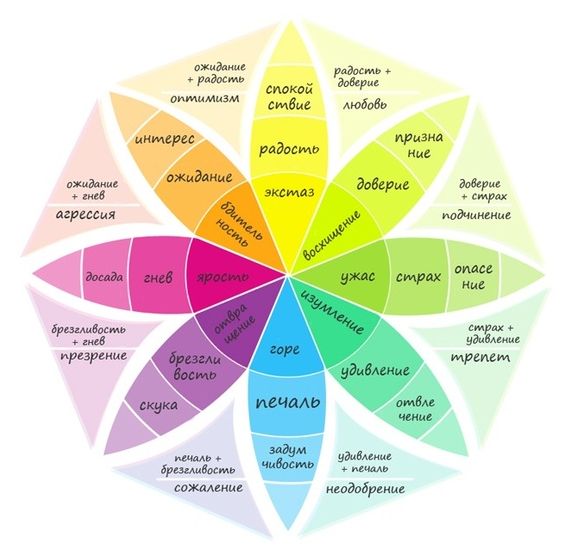

Центральный круг на колесе – аффекты, средний – базовые эмоции, внешний – некоторые сложные эмоции. Чем дальше от центра, тем менее интенсивным является переживание, в нижней точке, где лепестки смыкаются, – полное спокойствие, эмоциональный ноль. Итак, эмоции бывают базовые и сложные.

Соответсвенно, модель может быть обучена также и распознаванию интенсивности эмоций, что ещё больше улучшит ее точность. Этот развитый инструмент будет полезен для повышения качества жизни людей и его потенциал будет применяться в более широком спектре приложений.


Оптимизатор Adam в Keras является одним из наиболее популярных алгоритмов оптимизации стохастического градиентного спуска (SGD), используемых для обучения моделей машинного обучения.

Одно из главных преимуществ Adam заключается в том, что он объединяет лучшие свойства нескольких других оптимизаторов в одном. Адаптивный шаг градиента в Adam позволяет уменьшить количество гиперпараметров, которые необходимо подбирать для эффективного обучения, и, следовательно, упростить настройку процесса обучения.

Кроме того, Adam показывает более быстрое сходимость и более стабильные результаты на практике, что является результатом адаптивного шага градиента, использования смещенных оценок первого и второго моментов градиента, а также механизма обновления этих моментов.
Именно поэтому я выбрала его. 
